In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia_ca3.csv')

In [3]:
def d2_Kelperian_Profile():
    fig, ax = plt.subplots(figsize=(9,9))
    sc = ax.scatter(df.rtc_arcsec, df.vlsr_kms, s=40, c='black')
    _ = ax.set_xlabel(f"Maser distance (\")", fontsize = 16) 
    _ = ax.set_ylabel("$\\nu_{LSR}$ [km s-1]", fontsize = 16)
    ax.tick_params(labelsize=14)
    plt.title("Keplerian Profile of d2", fontsize=17)
    
    return ax

In [4]:
X = df.rtc_arcsec
y = df.vlsr_kms

In [31]:
import numpy as np

p2 = np.polyfit(X,y,2)
xp = np.linspace(0.025,0.07,100)
yfit = np.polyval(p2,xp)

In [32]:
def d2_Kelperian_Profile():
    
    fig, ax = plt.subplots(figsize=(9,9))
    sc = ax.scatter(df.rtc_arcsec, df.vlsr_kms, s=40, c='black')
    _ = ax.set_xlabel(f"Maser distance (\")", fontsize = 16) 
    _ = ax.set_ylabel("$\\nu_{LSR}$ [km s-1]", fontsize = 16)
    ax.tick_params(labelsize=14)
    ax.plot(xp,yfit,'m:', label='Keplerian curve $1/{\sqrt{r}}$')
    ax.legend(fontsize=14)
    plt.title("Keplerian Profile of d2", fontsize=17)
    return ax
    

<AxesSubplot:title={'center':'Keplerian Profile of d2'}, xlabel='Maser distance (")', ylabel='$\\nu_{LSR}$ [km s-1]'>

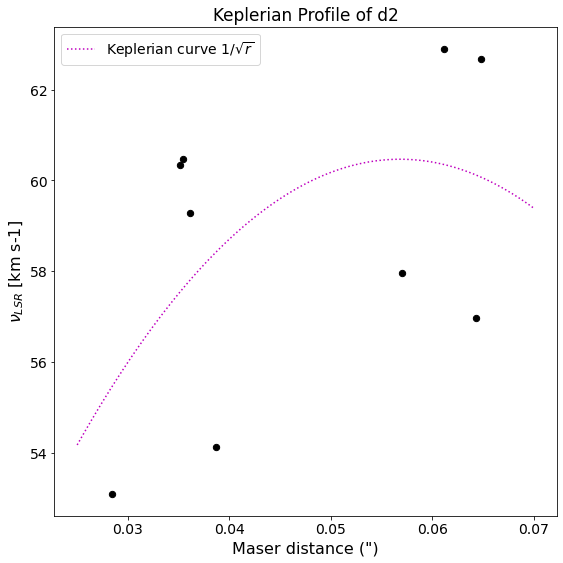

In [33]:
d2_Kelperian_Profile()

In [176]:
import numpy as np
from scipy.optimize import curve_fit

def func(x):
    return ((np.sqrt(x)))

xdata = df.rtc_arcsec.to_numpy
ydata = df.vlsr_kms.to_numpy

popt, pcov = curve_fit(func, xdata, ydata)



ValueError: Unable to determine number of fit parameters.

In [151]:
def d2_Kelperian_Profile():
    
    fig, ax = plt.subplots(figsize=(9,9))
    sc = ax.scatter(df.rtc_arcsec, df.vlsr_kms, s=40, c='black')
    _ = ax.set_xlabel(f"Maser distance (\")", fontsize = 16) 
    _ = ax.set_ylabel("$\\nu_{LSR}$ [km s-1]", fontsize = 16)
    ax.tick_params(labelsize=14)
    ax.plot(popt,popt,'m:', label='Keplerian curve $1/{\sqrt{r}}$')
    ax.legend(fontsize=14)
    plt.title("Keplerian Profile of d2", fontsize=17)
    
    return ax

NameError: name 'popt' is not defined

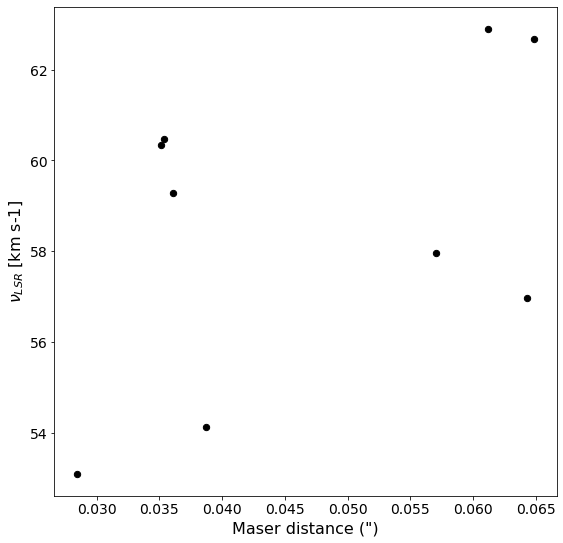

In [152]:
d2_Kelperian_Profile()

In [157]:
import numpy as np
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

popt, pcov = curve_fit(func, xdata, ydata)

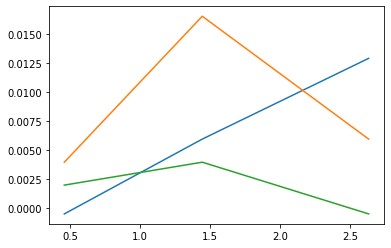

In [158]:
plt.plot(popt,pcov)

In [173]:
df.vlsr_kms.to_numpy

<bound method IndexOpsMixin.to_numpy of 0    57.970010
1    56.965715
2    53.101648
3    62.900434
4    62.681668
5    60.463501
6    59.292298
7    60.346169
8    54.123012
Name: vlsr_kms, dtype: float64>

In [172]:
np.linspace(0, 4, 50)

array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

/apps/python/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


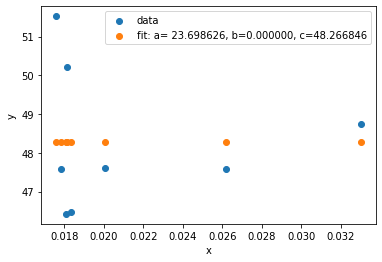

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.sqrt(b * x) + c

xdata = df.rtc_arcsec
ydata = df.vlsr_kms
plt.scatter(xdata, ydata, label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.scatter(xdata, func(xdata, *popt), label='fit: a=%10f, b=%6f, c=%0f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()